In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [168]:
df = pd.read_csv('Resources/IEA Global EV Data 2024.csv')
df.head(15)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000
6,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
7,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00240
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.00000
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.00000


In [169]:
print(df.columns)

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')


In [170]:
# Filter for relevant 'parameter' values (EV stock share or EV sales share)
# Filter by 'EV stock share' or 'EV sales share'
ev_adoption_data = df[df['parameter'].isin(['EV stock share'])]


In [171]:
# Filter for the units we're interested in, either 'percent' or 'vehicles'
ev_adoption_data = ev_adoption_data[ev_adoption_data['unit'].isin(['percent'])]


In [172]:
# Check how many rows are left after filtering
print(ev_adoption_data.shape)
print(ev_adoption_data.head())


(1529, 8)
       region    category       parameter  mode powertrain  year     unit  \
0   Australia  Historical  EV stock share  Cars         EV  2011  percent   
7   Australia  Historical  EV stock share  Cars         EV  2012  percent   
12  Australia  Historical  EV stock share  Cars         EV  2013  percent   
19  Australia  Historical  EV stock share  Cars         EV  2014  percent   
24  Australia  Historical  EV stock share  Cars         EV  2015  percent   

      value  
0   0.00039  
7   0.00240  
12  0.00460  
19  0.01400  
24  0.02700  


In [173]:
# Only keep relevant columns: region (country), year, and the value (EV adoption percentage or vehicles)
ev_adoption_data = ev_adoption_data[['region', 'year', 'parameter', 'value']]

In [174]:
# Check how many rows are left after filtering
print(ev_adoption_data.shape)
print(ev_adoption_data.head())


(1529, 4)
       region  year       parameter    value
0   Australia  2011  EV stock share  0.00039
7   Australia  2012  EV stock share  0.00240
12  Australia  2013  EV stock share  0.00460
19  Australia  2014  EV stock share  0.01400
24  Australia  2015  EV stock share  0.02700


In [175]:
# Check if there are still duplicates when considering region, year, and parameter
duplicates = ev_adoption_data[ev_adoption_data.duplicated(subset=['region', 'year', 'parameter'], keep=False)]
print("Duplicates found:")
print(duplicates)


Duplicates found:
        region  year       parameter    value
220    Belgium  2010  EV stock share   0.0190
222    Belgium  2010  EV stock share   0.0110
223    Belgium  2010  EV stock share   0.0013
224    Belgium  2010  EV stock share   0.0013
225    Belgium  2011  EV stock share   0.0040
...        ...   ...             ...      ...
12643    World  2035  EV stock share  11.0000
12646    World  2035  EV stock share  20.0000
12648    World  2035  EV stock share  18.0000
12650    World  2035  EV stock share  31.0000
12653    World  2035  EV stock share   9.0000

[1390 rows x 4 columns]


In [176]:
# Filter data for the years 2011 to 2023
ev_adoption_data = ev_adoption_data[(ev_adoption_data['year'] >= 2011) & (ev_adoption_data['year'] <= 2023)]

In [177]:
# Aggregate duplicates by taking the mean of the 'value' for each combination of region, year, and parameter
ev_adoption_data = ev_adoption_data.groupby(['region', 'year', 'parameter'], as_index=False)['value'].mean()

# Verify the shape after aggregation
print("Data after aggregation:", ev_adoption_data.shape)


Data after aggregation: (442, 4)


In [178]:
ev_adoption_data.dtypes

region        object
year           int64
parameter     object
value        float64
dtype: object

year           2011     2012     2013     2014     2015      2016      2017  \
region                                                                        
Australia  0.000390  0.00240  0.00460  0.01400  0.02700  0.037000  0.052000   
Austria    0.022000  0.03300  0.05300  0.08900  0.14000  0.240000  0.380000   
Belgium    0.010625  0.02470  0.03095  0.09840  0.18835  0.284025  0.389925   
Brazil          NaN      NaN      NaN  0.00016  0.00059  0.000810  0.001500   
Canada     0.001555  0.00674  0.01410  0.02730  0.02877  0.044067  0.070697   

year           2018      2019      2020      2021      2022     2023  
region                                                                
Australia  0.077000  0.140000  0.180000  0.320000  0.590000  1.20000  
Austria    0.530000  0.750000  1.200000  2.100000  3.000000  4.40000  
Belgium    0.495500  0.645500  0.958250  1.329000  1.834500  3.81500  
Brazil     0.002369  0.006820  0.008270  0.032225  0.081000  0.13025  
Canada     0.102870 

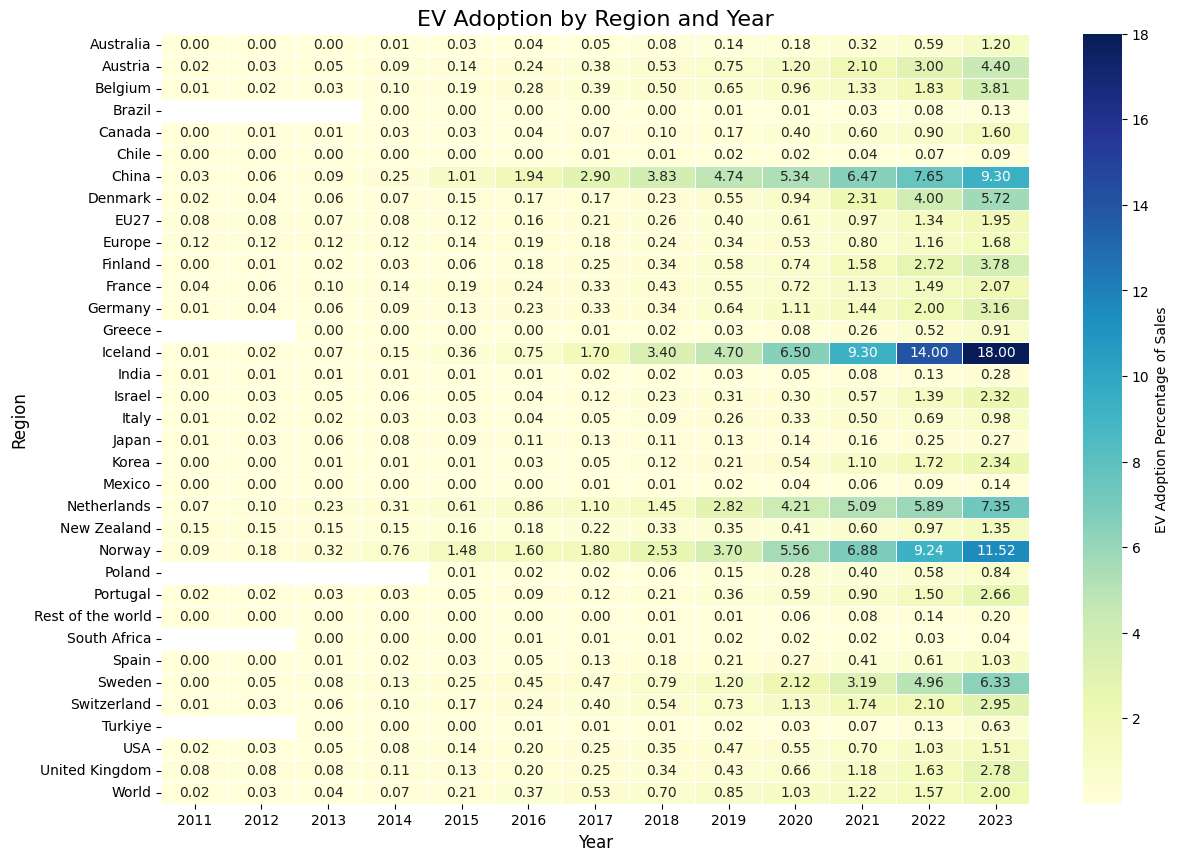

In [179]:
# Pivot the data: rows = region, columns = year, values = EV adoption percentage (or vehicles)
pivot_data = ev_adoption_data.pivot(index='region', columns='year', values='value')

# Verify the pivoted data
print(pivot_data.head())

# Create the heatmap
plt.figure(figsize=(14, 10))  # Adjust figure size as necessary
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'EV Adoption Percentage of Sales'}, linewidths=0.5)

# Add titles and labels
plt.title('EV Adoption by Region and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Region', fontsize=12)

# Show the plot
plt.show()


region  Australia  Austria   Belgium   Brazil    Canada    Chile     China  \
year                                                                         
2011      0.00039    0.022  0.010625      NaN  0.001555  0.00022  0.034717   
2012      0.00240    0.033  0.024700      NaN  0.006740  0.00038  0.056550   
2013      0.00460    0.053  0.030950      NaN  0.014100  0.00051  0.087150   
2014      0.01400    0.089  0.098400  0.00016  0.027300  0.00100  0.248425   
2015      0.02700    0.140  0.188350  0.00059  0.028770  0.00210  1.008750   

region  Denmark      EU27    Europe  ...  Portugal  Rest of the world  \
year                                 ...                                
2011    0.01595  0.082375  0.124975  ...     0.019           0.000845   
2012    0.03950  0.076250  0.119750  ...     0.023           0.000915   
2013    0.05575  0.071125  0.120000  ...     0.027           0.000550   
2014    0.07400  0.076475  0.121250  ...     0.029           0.000900   
2015    0.14850

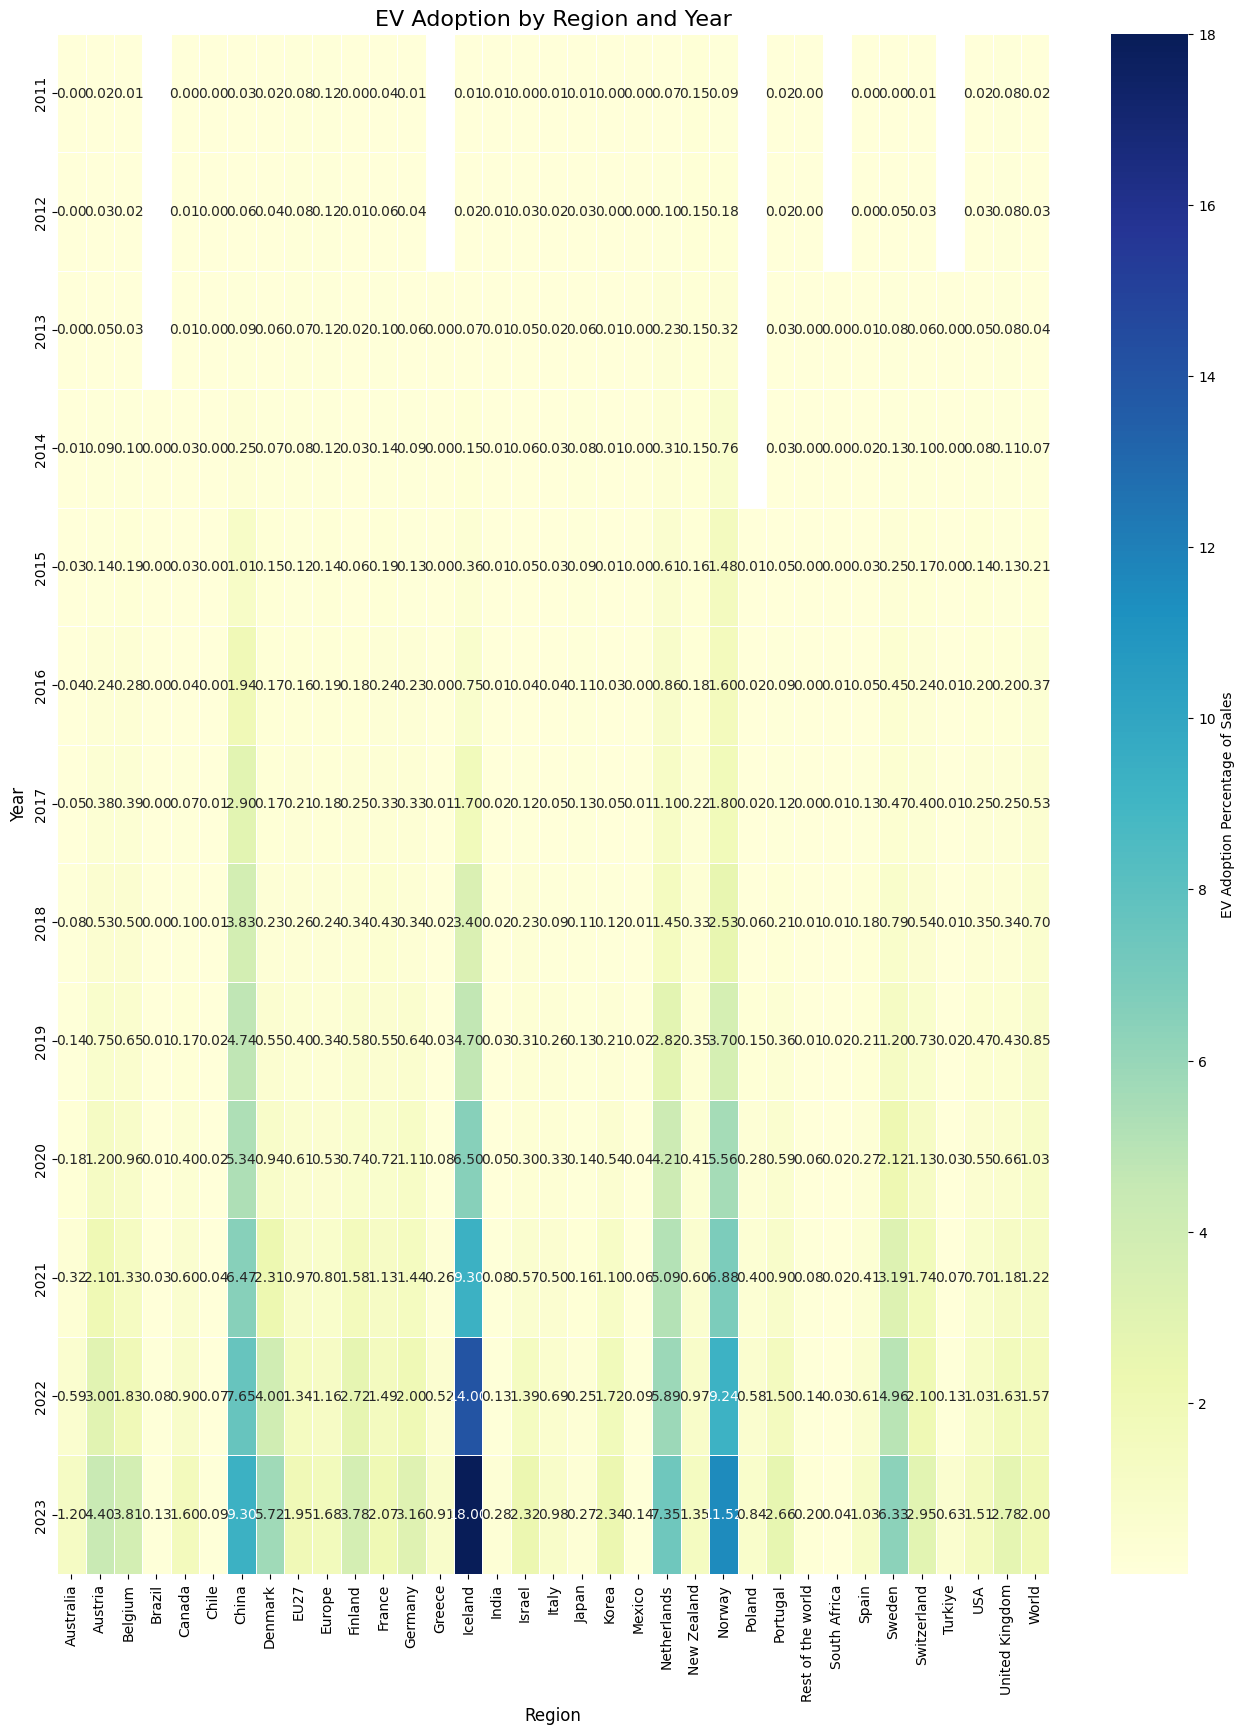

In [180]:
# Pivot the data: rows = region, columns = year, values = EV adoption percentage (or vehicles)
pivot_data = ev_adoption_data.pivot(index='year', columns='region', values='value')

# Verify the pivoted data
print(pivot_data.head())

# Create the heatmap
plt.figure(figsize=(16, 20))  # Adjust figure size as necessary
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'EV Adoption Percentage of Sales'}, linewidths=0.5)

# Add titles and labels
plt.title('EV Adoption by Region and Year', fontsize=16)
plt.ylabel('Year', fontsize=12)
plt.xlabel('Region', fontsize=12)

# Show the plot
plt.show()


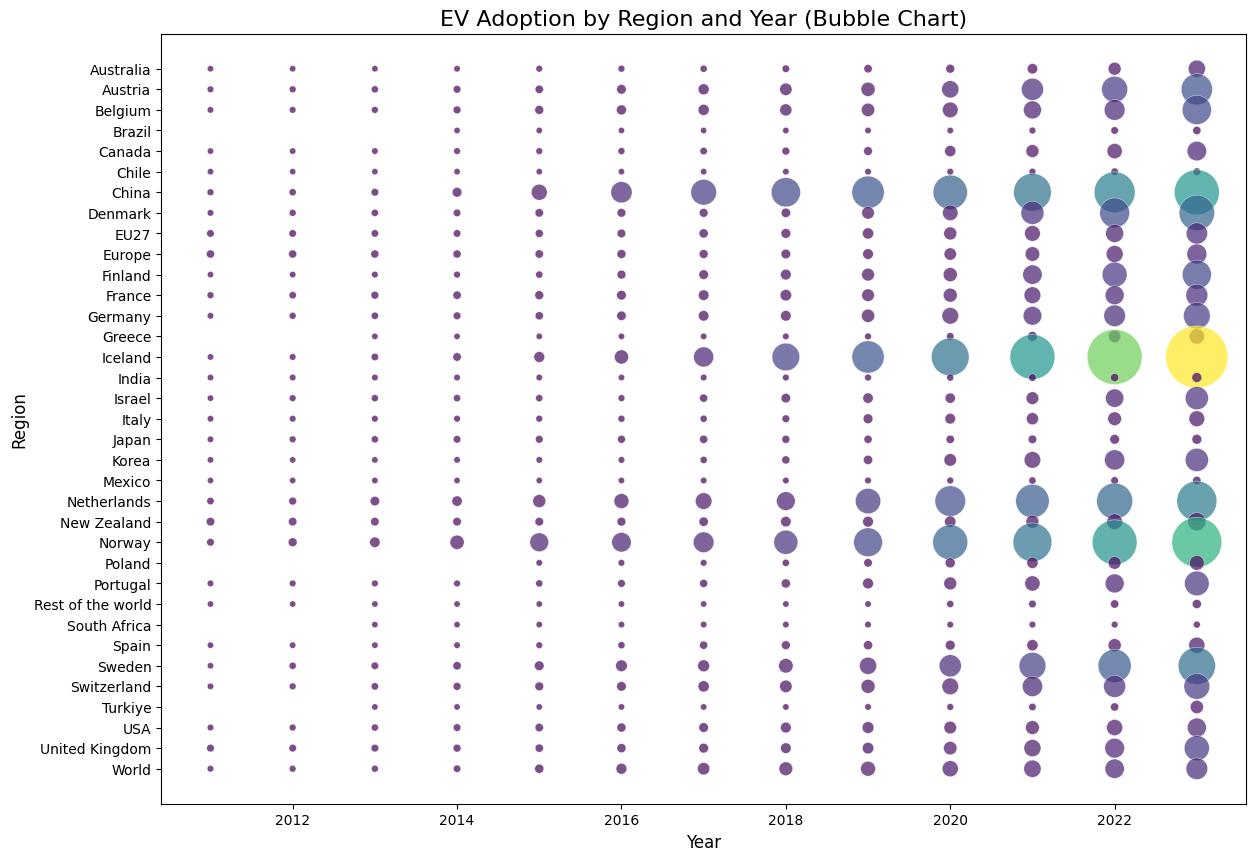

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataset is clean and there are no duplicates as we discussed earlier
ev_adoption_data = ev_adoption_data.groupby(['region', 'year', 'parameter'], as_index=False)['value'].mean()

# Filter data for the years 2011 to 2023
ev_adoption_data = ev_adoption_data[(ev_adoption_data['year'] >= 2011) & (ev_adoption_data['year'] <= 2023)]

# Optionally, filter for a specific 'parameter' (e.g., 'EV stock share')
ev_adoption_data = ev_adoption_data[ev_adoption_data['parameter'] == 'EV stock share']

# Create the bubble chart
plt.figure(figsize=(14, 10))  # Adjust figure size as necessary

sns.scatterplot(data=ev_adoption_data,
                x='year', 
                y='region', 
                size='value',   # Bubble size will represent the 'value'
                hue='value',    # Bubble color will also represent 'value'
                sizes=(20, 2000),  # Adjust bubble size range
                palette='viridis',  # Adjust color palette to suit your preference
                legend=False,
                alpha=0.7)

# Title and labels
plt.title('EV Adoption by Region and Year (Bubble Chart)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Region', fontsize=12)

# Show the plot
plt.show()


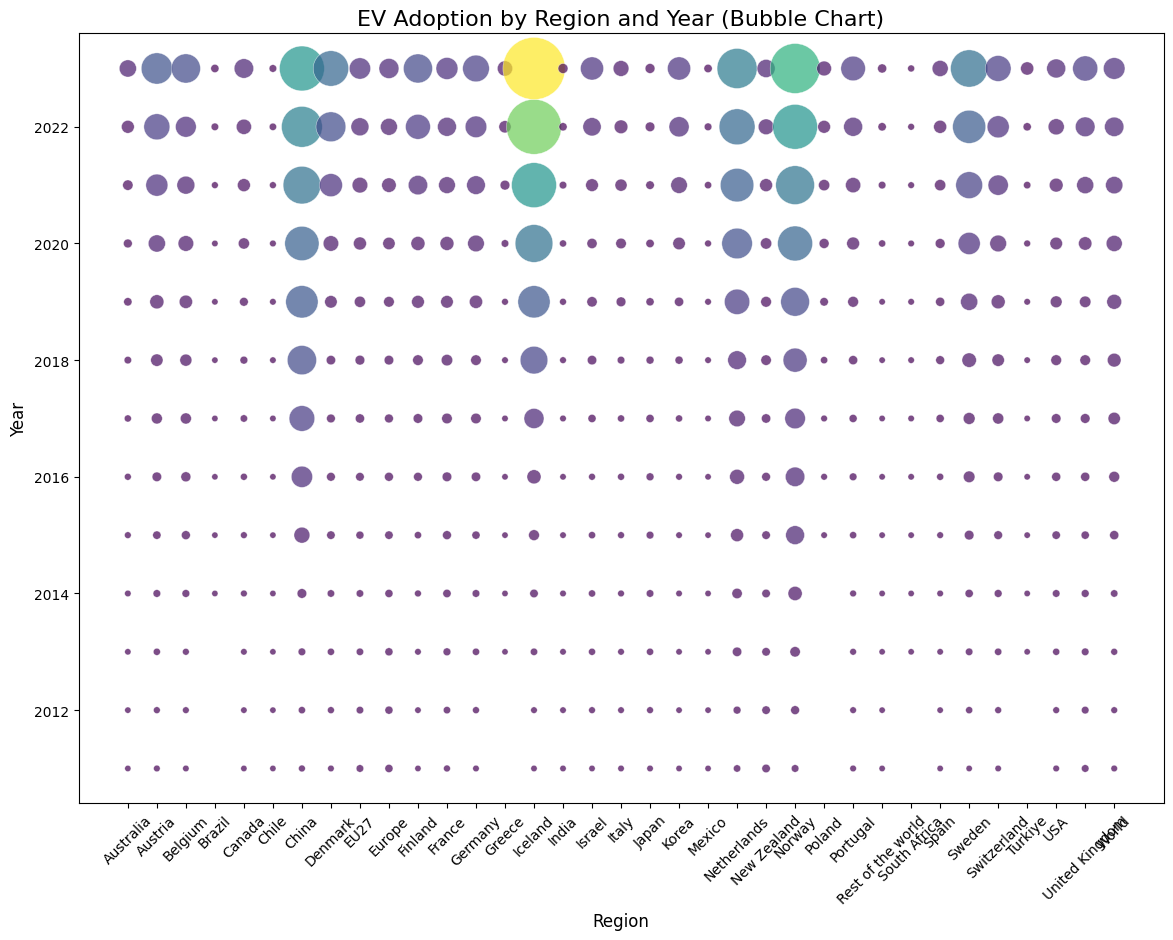

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataset is clean and there are no duplicates as we discussed earlier
ev_adoption_data = ev_adoption_data.groupby(['region', 'year', 'parameter'], as_index=False)['value'].mean()

# Filter data for the years 2011 to 2023
ev_adoption_data = ev_adoption_data[(ev_adoption_data['year'] >= 2011) & (ev_adoption_data['year'] <= 2023)]

# Optionally, filter for a specific 'parameter' (e.g., 'EV stock share')
ev_adoption_data = ev_adoption_data[ev_adoption_data['parameter'] == 'EV stock share']

# Create the bubble chart
plt.figure(figsize=(14, 10))  # Adjust figure size as necessary

sns.scatterplot(data=ev_adoption_data,
                x='region', 
                y='year', 
                size='value',   # Bubble size will represent the 'value'
                hue='value',    # Bubble color will also represent 'value'
                sizes=(20, 2000),  # Adjust bubble size range
                palette='viridis',  # Adjust color palette to suit your preference
                legend=False,
                alpha=0.7)

# Title and labels
plt.title('EV Adoption by Region and Year (Bubble Chart)', fontsize=16)
plt.ylabel('Year', fontsize=12)
plt.xlabel('Region', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


region   China  Iceland  Netherlands     Norway    USA   World
year                                                          
2023    9.3000     18.0       7.3525  11.525000  1.510  2.0025
2022    7.6475     14.0       5.8875   9.240000  1.035  1.5750
2021    6.4700      9.3       5.0900   6.877500  0.705  1.2200
2020    5.3400      6.5       4.2100   5.555500  0.555  1.0275
2019    4.7400      4.7       2.8250   3.700575  0.465  0.8525


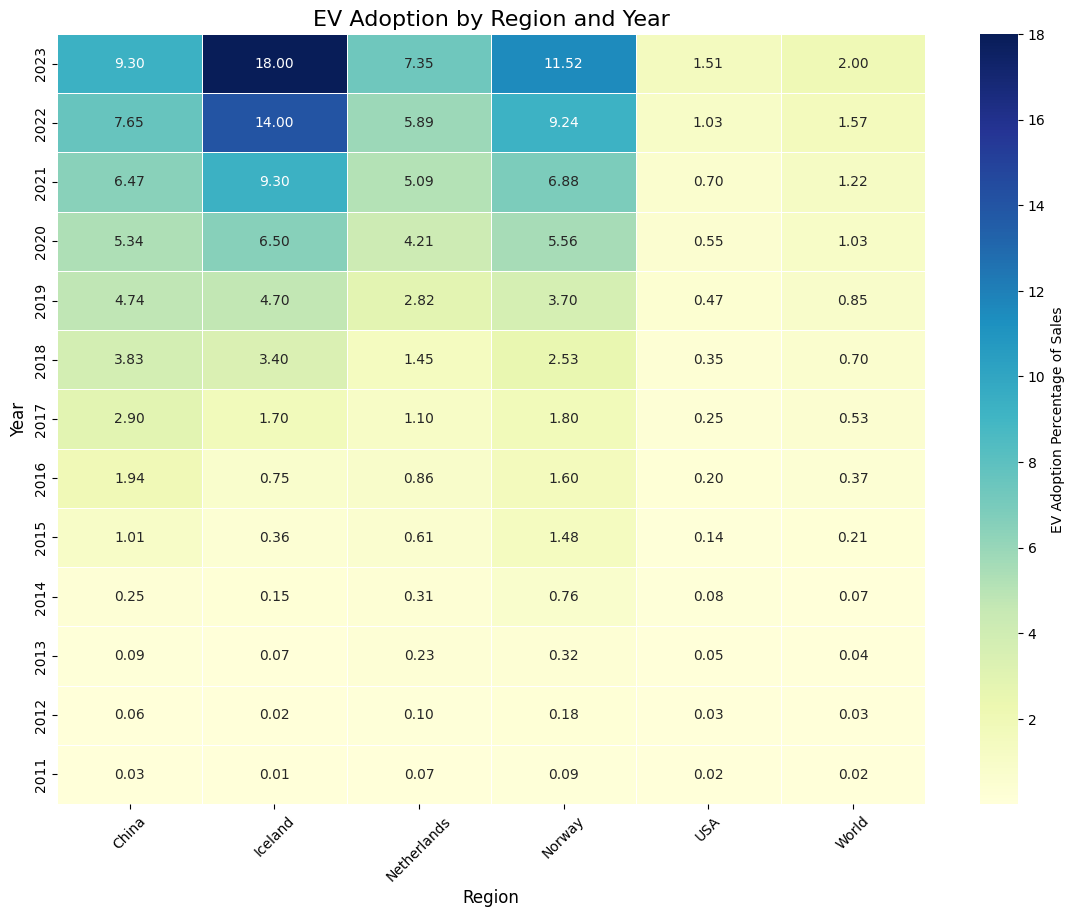

In [183]:
# Ensure the dataset is clean and there are no duplicates as we discussed earlier
ev_adoption_data = ev_adoption_data.groupby(['region', 'year', 'parameter'], as_index=False)['value'].mean()

# Filter data for the years 2011 to 2023
ev_adoption_data = ev_adoption_data[(ev_adoption_data['year'] >= 2011) & (ev_adoption_data['year'] <= 2023)]

# Optionally, filter for a specific 'parameter' (e.g., 'EV stock share')
# ev_adoption_data = ev_adoption_data[ev_adoption_data['parameter'] == 'EV stock share']

# List of specific countries you want to include (replace with actual country names)
countries_of_interest = ['China', 'Iceland', 'Netherlands', 'Norway', 'USA', 'World'] 

# Filter data for these specific countries
ev_adoption_data = ev_adoption_data[ev_adoption_data['region'].isin(countries_of_interest)]

# Pivot the data: rows = year, columns = region, values = EV adoption percentage (or vehicles)
pivot_data = ev_adoption_data.pivot(index='year', columns='region', values='value')

# Ensure 'year' is sorted in ascending order
pivot_data = pivot_data.sort_index(ascending=False)

# Check the pivot data after sorting
print(pivot_data.head())

# Create the heatmap
plt.figure(figsize=(14, 10))  # Adjust figure size as necessary

# Create a heatmap with manually sorted years in ascending order
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'EV Adoption Percentage of Sales'}, linewidths=0.5)

# Add titles and labels
plt.title('EV Adoption by Region and Year', fontsize=16)
plt.ylabel('Year', fontsize=12)
plt.xlabel('Region', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



region   China  Iceland  Netherlands     Norway    USA   World
year                                                          
2023    9.3000     18.0       7.3525  11.525000  1.510  2.0025
2022    7.6475     14.0       5.8875   9.240000  1.035  1.5750
2021    6.4700      9.3       5.0900   6.877500  0.705  1.2200
2020    5.3400      6.5       4.2100   5.555500  0.555  1.0275
2019    4.7400      4.7       2.8250   3.700575  0.465  0.8525


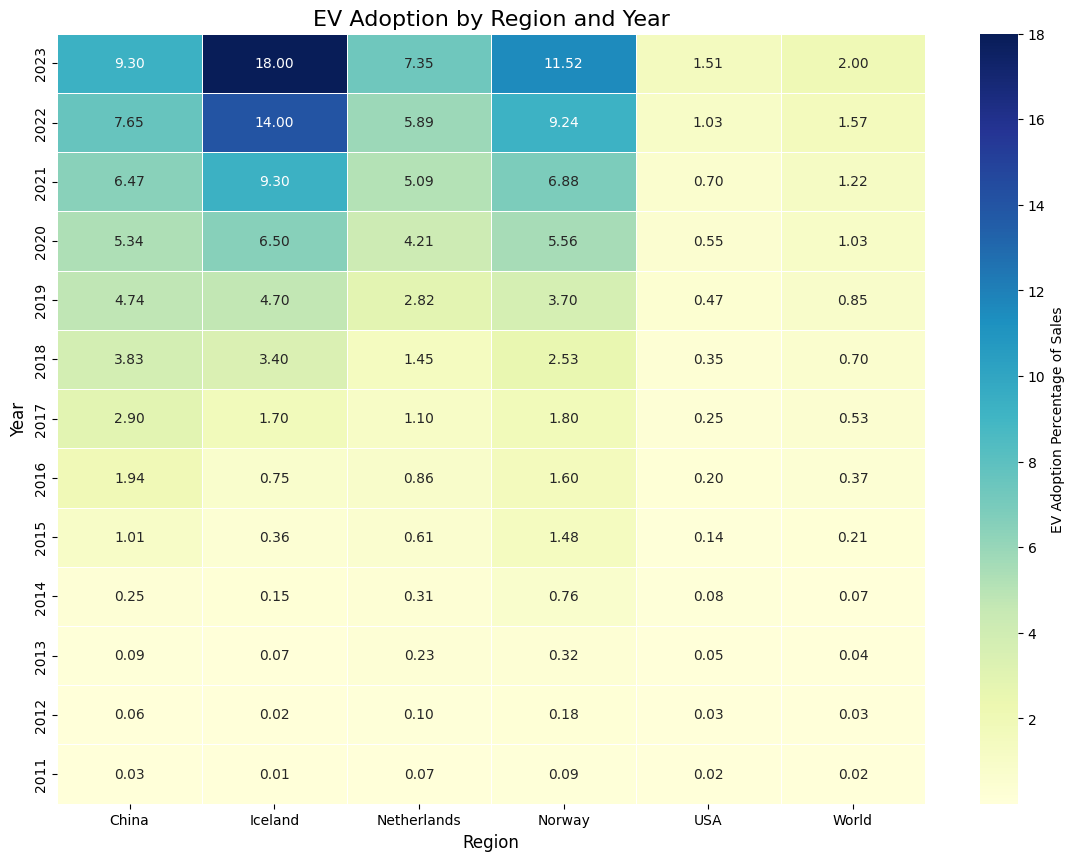

In [184]:
# Ensure the dataset is clean and there are no duplicates as we discussed earlier
ev_adoption_data = ev_adoption_data.groupby(['region', 'year', 'parameter'], as_index=False)['value'].mean()

# Filter data for the years 2011 to 2023
ev_adoption_data = ev_adoption_data[(ev_adoption_data['year'] >= 2011) & (ev_adoption_data['year'] <= 2023)]

# Optionally, filter for a specific 'parameter' (e.g., 'EV stock share')
# ev_adoption_data = ev_adoption_data[ev_adoption_data['parameter'] == 'EV stock share']

# List of specific countries you want to include (replace with actual country names)
countries_of_interest = ['China', 'Iceland', 'Netherlands', 'Norway', 'USA', 'World'] 

# Filter data for these specific countries
ev_adoption_data = ev_adoption_data[ev_adoption_data['region'].isin(countries_of_interest)]

# Convert the 'year' column to numeric to ensure proper sorting
ev_adoption_data['year'] = pd.to_numeric(ev_adoption_data['year'])

# Pivot the data: rows = year, columns = region, values = EV adoption percentage (or vehicles)
pivot_data = ev_adoption_data.pivot(index='year', columns='region', values='value')

# Sort the index (year) to be in ascending order
pivot_data = pivot_data.sort_index(ascending=False)

# Verify the pivoted data
print(pivot_data.head())

# Create the heatmap
plt.figure(figsize=(14, 10))  # Adjust figure size as necessary
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'EV Adoption Percentage of Sales'}, linewidths=0.5)

# Add titles and labels
plt.title('EV Adoption by Region and Year', fontsize=16)
plt.ylabel('Year', fontsize=12)
plt.xlabel('Region', fontsize=12)

# Show the plot
plt.show()


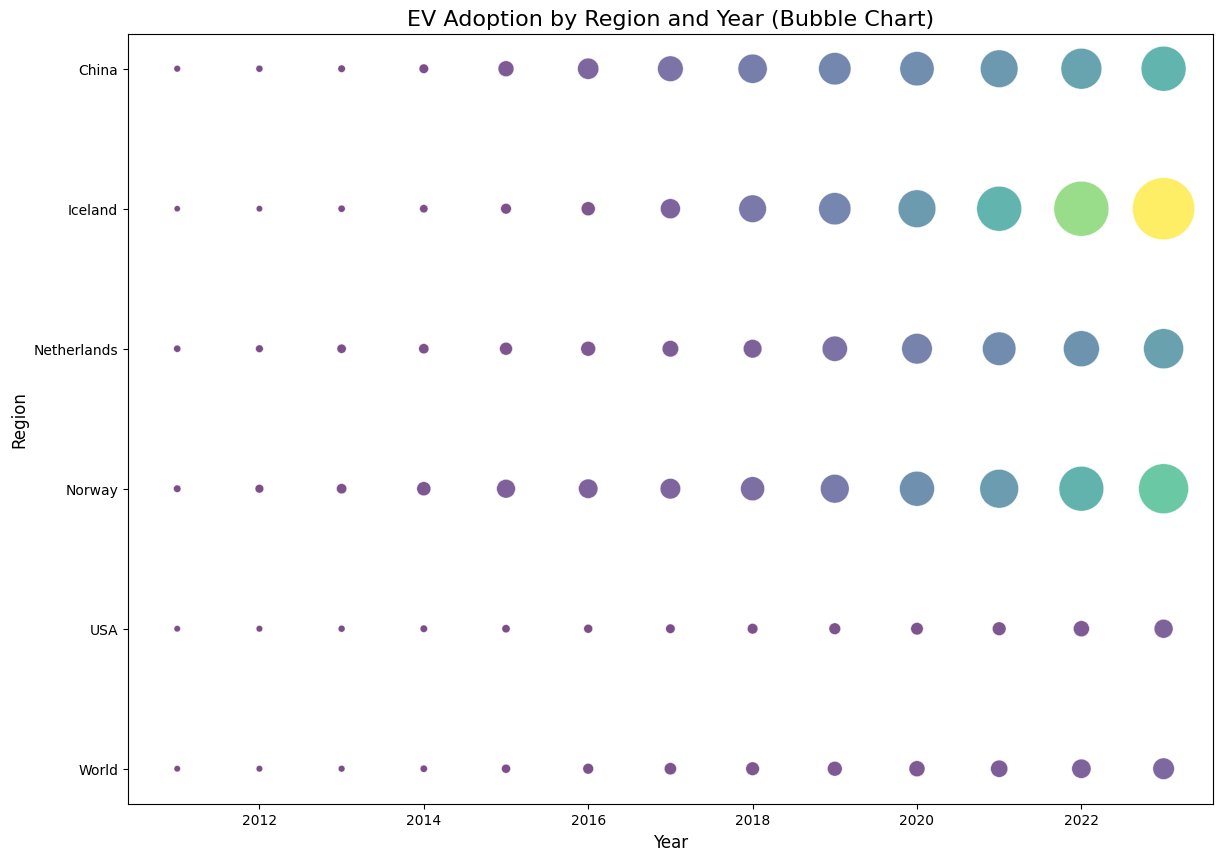

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataset is clean and there are no duplicates as we discussed earlier
ev_adoption_data = ev_adoption_data.groupby(['region', 'year', 'parameter'], as_index=False)['value'].mean()

# Filter data for the years 2011 to 2023
ev_adoption_data = ev_adoption_data[(ev_adoption_data['year'] >= 2011) & (ev_adoption_data['year'] <= 2023)]

# Optionally, filter for a specific 'parameter' (e.g., 'EV stock share')
ev_adoption_data = ev_adoption_data[ev_adoption_data['parameter'] == 'EV stock share']

# Create the bubble chart
plt.figure(figsize=(14, 10))  # Adjust figure size as necessary

sns.scatterplot(data=ev_adoption_data,
                x='year', 
                y='region', 
                size='value',   # Bubble size will represent the 'value'
                hue='value',    # Bubble color will also represent 'value'
                sizes=(20, 2000),  # Adjust bubble size range
                palette='viridis',  # Adjust color palette to suit your preference
                legend=False,
                alpha=0.7)

# Title and labels
plt.title('EV Adoption by Region and Year (Bubble Chart)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Region', fontsize=12)

# Show the plot
plt.show()


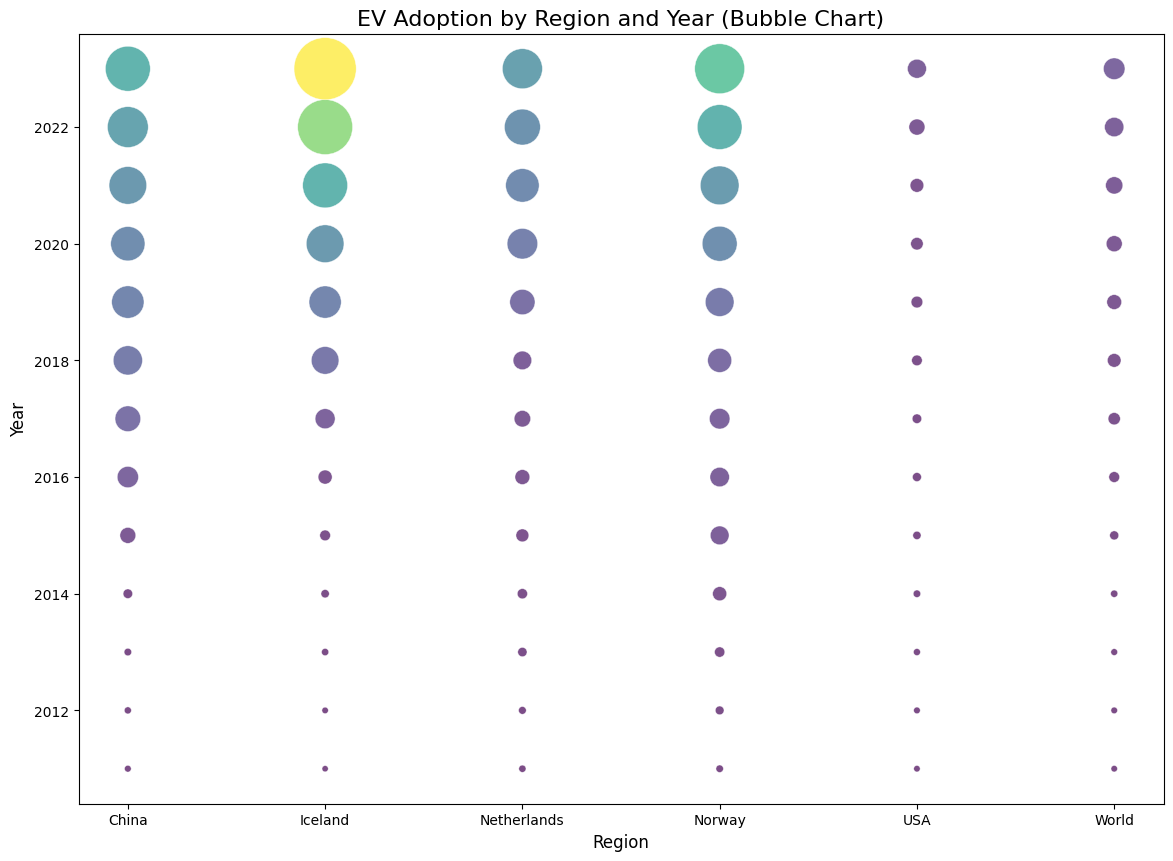

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataset is clean and there are no duplicates as we discussed earlier
ev_adoption_data = ev_adoption_data.groupby(['region', 'year', 'parameter'], as_index=False)['value'].mean()

# Filter data for the years 2011 to 2023
ev_adoption_data = ev_adoption_data[(ev_adoption_data['year'] >= 2011) & (ev_adoption_data['year'] <= 2023)]

# Optionally, filter for a specific 'parameter' (e.g., 'EV stock share')
ev_adoption_data = ev_adoption_data[ev_adoption_data['parameter'] == 'EV stock share']

# Create the bubble chart
plt.figure(figsize=(14, 10))  # Adjust figure size as necessary

sns.scatterplot(data=ev_adoption_data,
                x='region', 
                y='year', 
                size='value',   # Bubble size will represent the 'value'
                hue='value',    # Bubble color will also represent 'value'
                sizes=(20, 2000),  # Adjust bubble size range
                palette='viridis',  # Adjust color palette to suit your preference
                legend=False,
                alpha=0.7)

# Title and labels
plt.title('EV Adoption by Region and Year (Bubble Chart)', fontsize=16)
plt.ylabel('Year', fontsize=12)
plt.xlabel('Region', fontsize=12)

# Show the plot
plt.show()


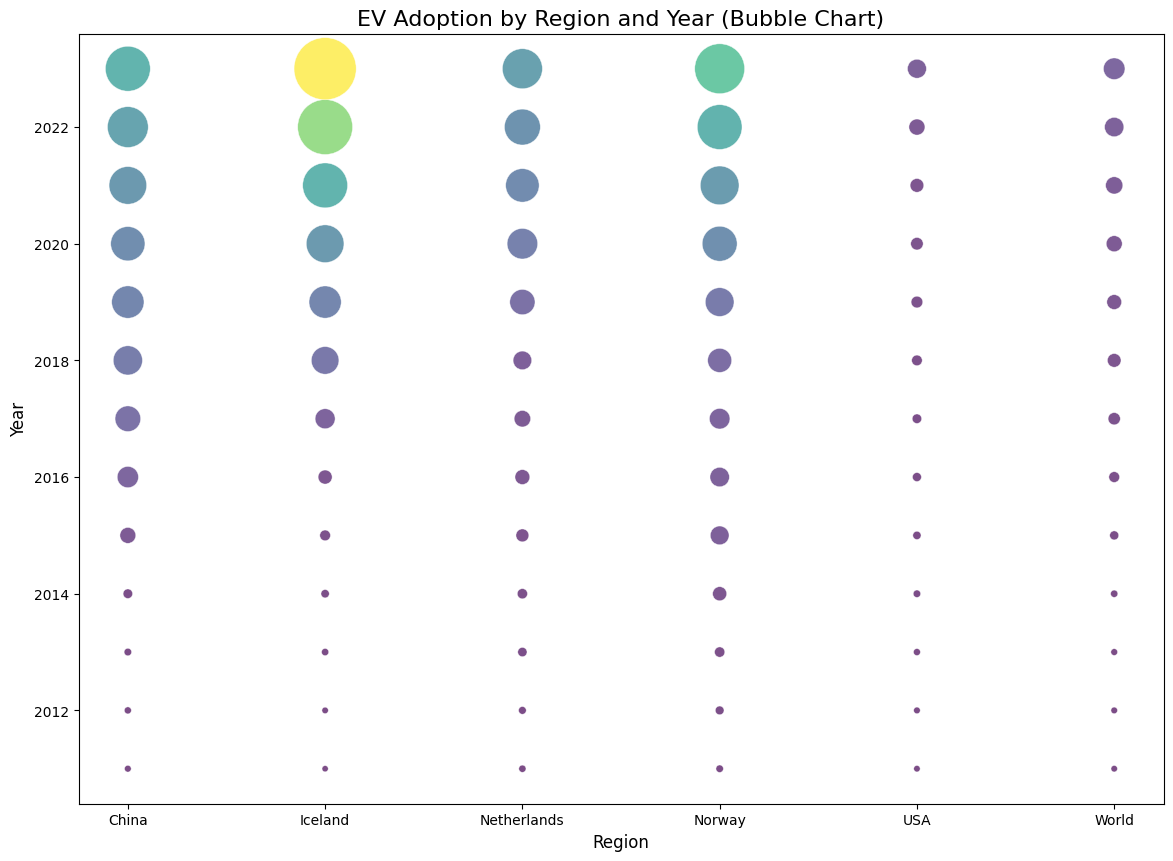

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataset is clean and there are no duplicates as we discussed earlier
ev_adoption_data = ev_adoption_data.groupby(['region', 'year', 'parameter'], as_index=False)['value'].mean()

# Filter data for the years 2011 to 2023
ev_adoption_data = ev_adoption_data[(ev_adoption_data['year'] >= 2011) & (ev_adoption_data['year'] <= 2023)]

# Optionally, filter for a specific 'parameter' (e.g., 'EV stock share')
ev_adoption_data = ev_adoption_data[ev_adoption_data['parameter'] == 'EV stock share']

# Create the bubble chart
plt.figure(figsize=(14, 10))  # Adjust figure size as necessary

sns.scatterplot(data=ev_adoption_data,
                x='region', 
                y='year', 
                size='value',   # Bubble size will represent the 'value'
                hue='value',    # Bubble color will also represent 'value'
                sizes=(20, 2000),  # Adjust bubble size range
                palette='viridis',  # Adjust color palette to suit your preference
                legend=False,
                alpha=0.7)

# Title and labels
plt.title('EV Adoption by Region and Year (Bubble Chart)', fontsize=16)
plt.ylabel('Year', fontsize=12)
plt.xlabel('Region', fontsize=12)

# Show the plot
plt.show()


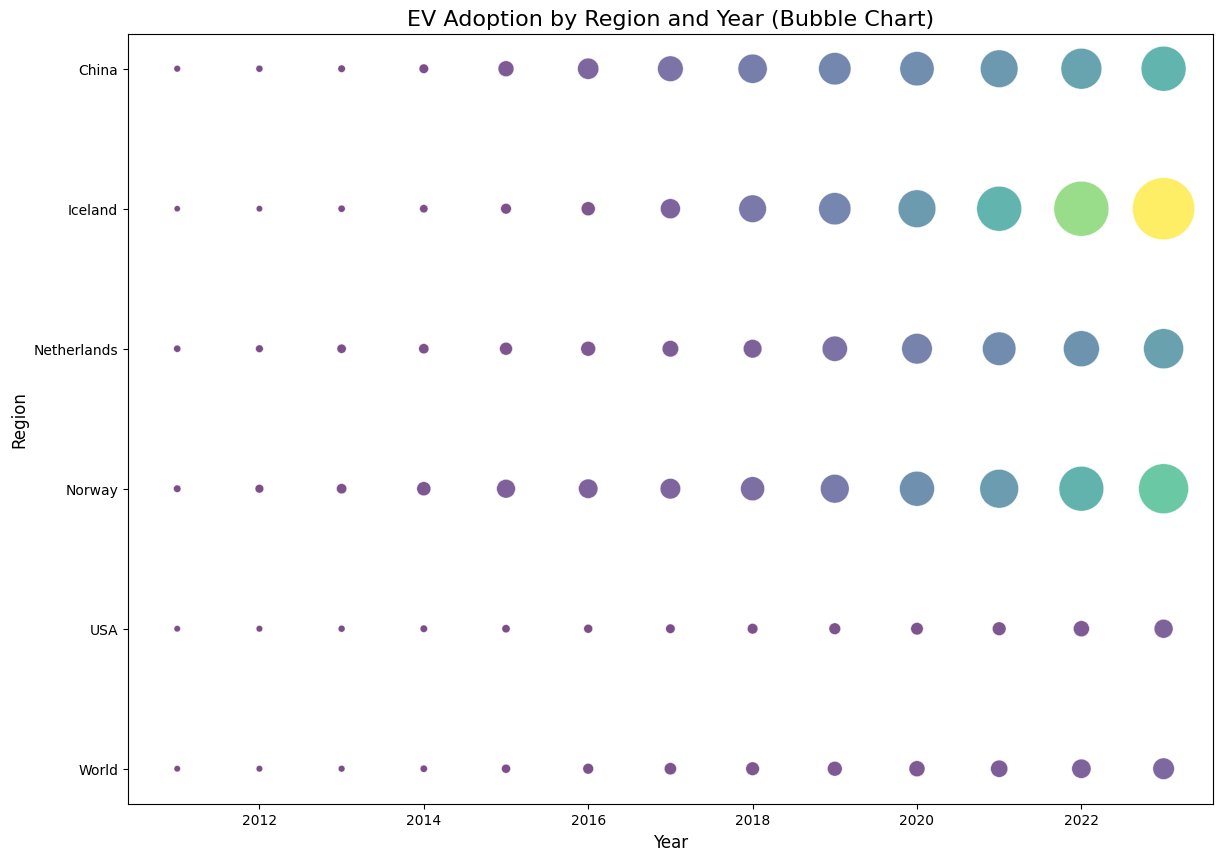

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataset is clean and there are no duplicates as we discussed earlier
ev_adoption_data = ev_adoption_data.groupby(['region', 'year', 'parameter'], as_index=False)['value'].mean()

# Filter data for the years 2011 to 2023
ev_adoption_data = ev_adoption_data[(ev_adoption_data['year'] >= 2011) & (ev_adoption_data['year'] <= 2023)]

# Optionally, filter for a specific 'parameter' (e.g., 'EV stock share')
# ev_adoption_data = ev_adoption_data[ev_adoption_data['parameter'] == 'EV stock share']

# List of specific countries you want to include (replace with actual country names)
countries_of_interest = ['China', 'Iceland', 'Netherlands', 'Norway', 'USA', 'World'] 

# Filter data for these specific countries
ev_adoption_data = ev_adoption_data[ev_adoption_data['region'].isin(countries_of_interest)]
# Create the bubble chart
plt.figure(figsize=(14, 10))  # Adjust figure size as necessary

sns.scatterplot(data=ev_adoption_data,
                x='year', 
                y='region', 
                size='value',   # Bubble size will represent the 'value'
                hue='value',    # Bubble color will also represent 'value'
                sizes=(20, 2000),  # Adjust bubble size range
                palette='viridis',  # Adjust color palette to suit your preference
                legend=False,
                alpha=0.7)

# Title and labels
plt.title('EV Adoption by Region and Year (Bubble Chart)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Region', fontsize=12)

# Show the plot
plt.show()
